In [1]:
""" 
In this dataset, the output is a number between 0 and 1, but it represents two classes. In Keras, it
is recommended to categorize this type of output. This simply means that points with label 0 will
now have a label [1,0], and points with label 1 will now have a label [0,1]. We do this using the
to_categorical function as follows:
"""

import pandas
import numpy
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

import _plotting

# Setting random seeds to get reproducible results
numpy.random.seed(0)
tensorflow.random.set_seed(1)



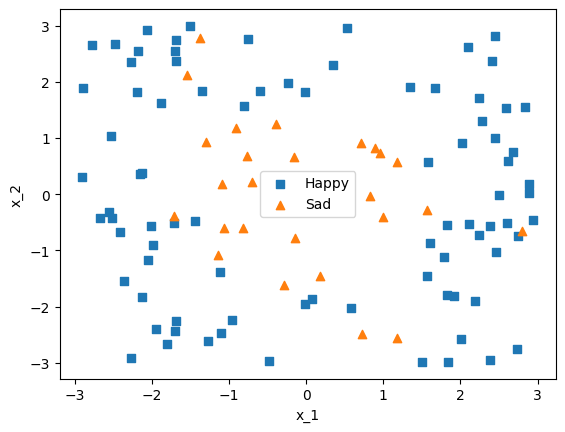

In [2]:
# Read the dataset
data = pandas.read_csv('one_circle.csv', index_col=0)
columns_features = ['x_1', 'x_2']
column_label = 'y'
features = data[columns_features].values
labels = data[column_label].values

_plotting.plot_scatter(data['x_1'][labels == 0], data['x_2'][labels == 0], marker = 's')
_plotting.plot_scatter(data['x_1'][labels == 1], data['x_2'][labels == 1], marker = '^')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(['Happy', 'Sad'])
plt.show()


In [ ]:
"""
We'll convert the label column to categorical to make it easier for the model to process. It also saves memory too. 
Pandas has a built-in function called factorize, which interprets the number of classes for us. Unlike keras.utils.to_categorical, this returns a 1D-array.
"""

In [3]:
# categorizing the output
series_labels, labels = pandas.factorize(data[column_label])

In [4]:
series_labels, labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]),
 Index([0, 1], dtype='int64'))

In [ ]:
""" 
Model Structure
We'll use a sequential model to add a few dense layers with the ReLu activation function. Why are we using sigmoid instead of softmax? 
It's also a common practice to add dropout. It is also a good idea to set our unit sizes as powers of 2, which was a trick for training slightly faster on GPUs. . 
We also use sparse_categorical_crossentropy since our labels are 1D.
"""

# Building the model
num_units_penultimate = 2**6
model = Sequential()
# first hidden layer with ReLU acitvation function
model.add(Dense(2**7, activation='relu', input_shape=(features.shape[1],)))
model.add(Dropout(.2))
# second hidden layer with ReLU acitvation function
model.add(Dense(num_units_penultimate, activation='relu'))
model.add(Dropout(.2))
# output layer with softmax activation function
model.add(Dense(len(labels), activation='sigmoid')) # two classes, else softmax

# Compiling the model
model.compile(
    loss = 'sparse_categorical_crossentropy', # 1D labels, else categorical_crossentropy
    optimizer='adam', # packages like Kera have many built in tricks that help us train a model in an optimal way. Best oprimizers to choose are Adam (current), SGD, RMSProp, AdaGrad
    metrics=['accuracy'] # as the training goes, we get reports on how the model is doing at each epoch. This flag allows us to define what metrics we want to see during the training.
)
model.summary()

/Users/kylestanford/Library/CloudStorage/OneDrive-Partners/Documents/GitHub/Grokking-Machine-Learning/grokking_my_venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-11 15:04:56.807898: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-08-11 15:04:56.807961: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-08-11 15:04:56.807973: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2025-08-11 15:04:56.808015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-08-11 15:04:56.8

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,770 (34.26 KB)

 Trainable params: 8,770 (34.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
""" 
Training the Model
It's a good practice to set your batch size equal to the number of penultimate neurons in your layer. 
Training accuracy will vary due to the stochastic nature of the model, but you can clearly see the loss going down and the accuracy going up.
"""

# training the model
history = model.fit(features, series_labels, epochs=100, batch_size=num_units_penultimate) # remember what features and labels are, very basic stuff here.

Epoch 1/100


2025-08-11 15:06:58.330399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.4909 - loss: 0.8003
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5182 - loss: 0.7340
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6091 - loss: 0.6721
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5455 - loss: 0.6633
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5909 - loss: 0.6543
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6636 - loss: 0.6078
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5909 - loss: 0.6715
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5545 - loss: 0.6295
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6091 - loss: 0.6355
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6818 - loss: 0.6398
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6727 - loss: 0.6222
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6455 - loss: 0.6378


198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step


/Users/kylestanford/Library/CloudStorage/OneDrive-Partners/Documents/GitHub/Grokking-Machine-Learning/chapter_10/_plotting.py:69: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


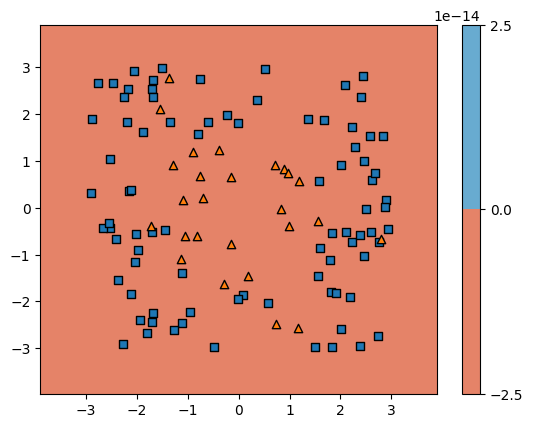

In [7]:
_plotting.plot_decision_boundary_2D(features, series_labels, model)